Import IMDB dataset of movie reviews, load and split data into training and test sets

the reviews (sequences of
words) have been turned into sequences of integers, where each integer
stands for a specific word in a dictionary

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


argument num_words=10000 means you’ll only keep the top
10,000 most frequently occurring words in the training data - allows you to work with vector data of manageable size

In [5]:
train_data[0]
train_labels[0]

1

Decode reviews back to English words:

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #Reverse the decoding of reviews by mapping words back to integers
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


Encoding the integer sequences into a binary matrix

In [15]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #Creates all zero matrix of shape(len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1    # Sets specified indices of results[i] to 1 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[2]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize labels

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
#The model definition:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Input(shape = (10000,) ))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
x_val = x_train[:10000]
partial_x_train= x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 867ms/step - accuracy: 0.6987 - loss: 0.6073 - val_accuracy: 0.8486 - val_loss: 0.4148
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8934 - loss: 0.3537 - val_accuracy: 0.8641 - val_loss: 0.3529
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9175 - loss: 0.2633 - val_accuracy: 0.8842 - val_loss: 0.2983
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9316 - loss: 0.2158 - val_accuracy: 0.8805 - val_loss: 0.2955
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9455 - loss: 0.1743 - val_accuracy: 0.8890 - val_loss: 0.2748
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9577 - loss: 0.1453 - val_accuracy: 0.8854 - val_loss: 0.2815
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9602 - loss: 0.1279 - val_accuracy: 0.8875 - val_loss: 0.2885
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9706 - loss: 0.1099 - val_accuracy: 0.8854 -

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
history_dict['accuracy']

[0.7825109362602234,
 0.892194390296936,
 0.9177871942520142,
 0.9324835538864136,
 0.9451445937156677,
 0.9535361528396606,
 0.9616228342056274,
 0.9677528738975525,
 0.9737904071807861,
 0.9771997928619385,
 0.9802597165107727,
 0.9865885376930237,
 0.9846457242965698,
 0.9897238612174988,
 0.9910567402839661,
 0.993205189704895,
 0.9952885508537292,
 0.9962239861488342,
 0.9971354007720947,
 0.9967859387397766]

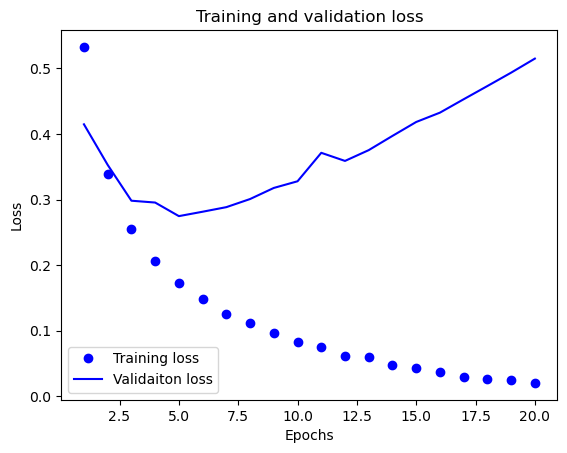

In [42]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss") #bo for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validaiton loss') #b fo solid blue line

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

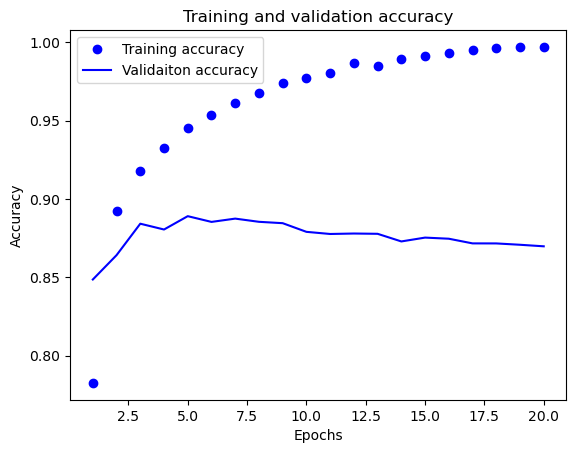

In [44]:
plt.clf() #Clears the figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label="Training accuracy") #bo for blue dot
plt.plot(epochs, val_acc_values, 'b', label='Validaiton accuracy') #b fo solid blue line

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()